## 14 동명이인 찾기(2) - 딕셔너리

### 해시 테이블
- 키값과 Value 데이터를 가진 구조를 해시 테이블이라 부르고 해시 테이블을 이용해서 탐색
- 키값을 해시 함수에 넣어서 계산하면 해시 테이블의 주소 값이 나오는데 계산된 값은 해시값 또는 해시 주소라고 함
    - 예) 주소와 우편번호의 관계

In [1]:
# 두 번 이상 나온 이름 찾기
# 입력: 이름이 n개 들어 있는 리스트
# 출력: n개의 이름 중 반복되는 이름의 집합

def find_same_name(a):
    # 1단계: 각 이름이 등장한 횟수를 딕셔너리로 만듦
    name_dict = {}
    for name in a:                 # 리스트 a에 있는 자료들을 차례로 반복
        if name in name_dict:      # 이름이 name_dict에 있으면
            name_dict[name] += 1   # 등장 횟수를 1 증가
        else:                      # 새 이름이면
            name_dict[name] = 1    # 등장 횟수를 1로 저장
            
    # 2단계: 만들어진 딕셔너리에서 등장 횟수가 2 이상인 것을 결과에 추가
    result = set()                 # 결과값을 저장할 빈 집합
    for name in name_dict:        # 딕셔너리 name_dict에 있는 자료들을 차례로 반복
        if name_dict[name] >= 2:
            result.add(name)
            
    return result

name = ["Tom","Jerry","Mike","Tom"]    # 대소문자 유의: 파이썬은 대소문자를 구분함
print(find_same_name(name))

name2 = ["Tom","Jerry","Mike","Tom","Mike"]
print(find_same_name(name2))

{'Tom'}
{'Mike', 'Tom'}


#### 연습 문제
14-1. 학생번호로 학생 이름 찾기  
학생 번호와 이름이 주어졌을 때, 학생 번호를 입력하면 그 학생 번호에 해당하는 이름을 돌려주고,  
해당하는 학생 번호가 없으면 물음표 돌려주기

In [2]:
# 학생 번호에 해당하는 학생 이름 찾기(dict 이용)
# 입력: 학생 명부 딕셔너리 s_info, 찾는 학생 번호 find_no
# 출력: 해당하는 학생 이름, 해당하는 학생 번호가 없으면 물음표"?"

def get_name(s_info, find_no):
    if find_no in s_info:
        return s_info[find_no]
    else:
        return "?"    # 해당하는 번호가 없을 때

sample_info = {39:'Justin', 14:'John', 67:'Mike', 105:'Summer'}

print(get_name(sample_info, 105))
print(get_name(sample_info, 777))

Summer
?


## 15 친구의 친구 찾기 - 그래프

In [3]:
# 친구 리스트에서 자신의 모든 친구를 찾는 알고리즘
# 입력: 친구 관계 그래프 g, 모든 친구를 찾을 자신 start
# 출력: 모든 친구의 이름

def print_all_friends(g, start):
    qu = []        # 기억 장소 1: 앞으로 처리해야 할 사람들을 큐에 저장
    done = set()   # 기억 장소 2: 이미 큐에 추가한 사람들을 집합에 기록(중복 방지)
    
    qu.append(start)    # 자신을 큐에 넣고 시작
    done.add(start)     # 집합에도 추가
    
    while qu:            # 큐에 처리할 사람이 남아 있는 동안
        p = qu.pop(0)    # 큐에서 처리 대상을 한 명 꺼내
        print(p)         # 이름을 출력하고
        for x in g[p]:  # 그의 친구들 중에
            if x not in done:    # 아직 큐에 추가된 적이 없는 사람을
                qu.append(x)      # 큐에 추가하고
                done.add(x)       # 집합에도 추가
                
# 친구 관계 리스트
# A와 B가 친구이면
# A의 친구 리스트에도 B가 나오고, B의 친구 리스트에도 A가 나옴
fr_info = {
    'Summer':['John','Justin','Mike'],
    'John':['Summer','Justin'],
    'Justin':['John','Summer','Mike','May'],
    'Mike':['Summer','Justin'],
    'May':['Justin','Kim'],
    'Kim':['May'],
    'Tom':['Jerry'],
    'Jerry':['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer
John
Justin
Mike
May
Kim

Jerry
Tom


### 그래프의 개념
- 그래프(Graph)
    - 현실세계의 복잡한 작업을 시각적으로 구조화하여 표현
    - 이해하기 쉽고 가시적으로 설명할 때 유용한 도구
    - 현상이나 사물을 정점(Vertex)과 간선(Edge)으로 표현한 것
    - 선형 자료 구조나 트리 자료 구조로 표현하기 어려운
    - 다대다 관계를 가지는 원소들을 표현하기 위한 자료 구조
    - 주요 요소간의 관계, 거리, 비용 등 다양한 주제를 표현하고 설계할 때 유용
    - 두 정점이 간선으로 연결되어 있으면 인접(Adjacent)하다고 함
    - 간선은 두 정점의 관계를 나타냄
    - 그래프의 예
        - 전국의 도로망, 도시의 지하철, 네트워크 구성도
        - 전산망, 인간 관계, 사회 조직, 데이터 구조
        - 분자, 생물 유전자 관계 등
    - 관련된 사물이나 개념을 연결하여 그래프로 표현 가능
    - 가중치는 친밀감의 정도를 표현하며 거리, 시간 등이 될 수도 있음
- 그래프 종류
    - 무향 그래프: 간선에 방향성이 없는 그래프
    - 유향 그래프: 간선에 방향성이 있는 그래프(화살표)
        - 방향은 기업간의 공급 관계, 작업의 선후 관계 등 표현 가능
    - 가중그래프
        - 그래프의 정점을 연결하는 간선마다 일정한 값을 할당한 그래프
        - 간선에 할당하는 값은 각 정점 간의 거리나 비용과 같은 속성이 될 수 있음
        - 예) 정점이 도시를, 간선이 건설할 도로를 나타낸다면 도로의 건설 비용을 간선의 가중치로 나타낼 수도 있음
- 그래프 용어
    - 인접
        - 간선으로 연결되어 있는 두 정점을 일컫는 말
        - 이웃 관계에 있다고 표현하기도 함
    - 경로
        - 그래프에서 간선을 따라갈 수 있는 길을 순서대로 나열한 것
        - 그래프 G1에서 정점 A에서 정점 C까지의 경로는 A-B-C, A-D-C, A-E-B-C 등이 있음
        - A-B-C, A-D-C 경로의 길이는 2, A-E-B-C의 길이는 3임
    - 차수
        - 그래프에서 임의의 정점의 차수는 해당 정점에 연결된 간선의 개수
        - 그래프에서 모든 정점의 차수의 총합은 모든 간선 개수의 2배
- 그래프 표현
    - 그래프는 정점의 집합과 간선의 집합의 결합
        - 그래프를 표현하는 문제는 정점의 집합과 간선의 집합의 표현 문제로 생각할 수 있음
        - 간선은 정점과 정점이 인접 관계에 있음을 나타내는 존재
        - 그래프의 표현 문제는 간선, 즉 정점과 정점의 인접 관계를 어떻게 나타내는가의 문제임
    - 행렬을 이용하는 방식은 인접 행렬(Adjacency Matrix)
    - 리스트를 이용하는 방식은 인접 리스트(Adjacency List)
    - 인접 행렬
        - 그래프의 두 정점을 연결한 간선의 유무를 행렬로 저장
        - 정점끼리의 인접 관계를 나타내는 행렬
        - 각 정점을 행과 열의 원소로 표현
        - 두 정점을 연결하는 간선이 존재하면 행렬의 원소는 1, 존재하지 않으면 0으로 표현
        - 인접 행렬은 이해하기 쉽고 간서의 존재 여부를 즉각 알 수 있음
        - n X n 행렬로 표현(n: 정점의 총 수)
            - 원소(i,j) = 1: 정점 i와 정점 j 사이에 간선이 있음
            - 원소(i,j) = 0: 정점 i와 정점 j 사이에 간선이 없음
        - n X n 행렬이 필요하므로 $n^2$에 비례하는 공간이 필요
        - 행렬의 준비과정에서의 행렬의 모든 원소를 채우는 데만 $n^2$에 비례하는 시간 필요
        - 무향 그래프의 경우
            - 원소(i,j)는 정점 i로부터 정점j로 연결되는 간선이 있는지를 나타냄
        - 가중치 있는 그래프의 경우
            - 원소(i,j)는 1 대신에 가중치를 가짐
    - 인접 리스트
        - 각 정점에 인접한 정점들을 순서에 상관없이 연결 리스트로 표현
        - 인접 리스트에서는 인접 행렬과는 달리 존재하지 않는 간선은 표현상 나타나지 않음
        - 각 정점의 차수 만큼 노드를 연결
        - 인접 리스트의 각 노드는 정점을 저장하는 필드와 다음 인접 정점을 연결하는 링크 필드로 구성
        - 정점의 헤드 노드는 정점에 대한 리스트의 시작을 표현
        - 가중치가 있는 그래프의 경우 리스트에 가중치도 보관함
        - 인접 리스트는 공간이 간선의 총 수에 비례하므로 인접 행렬에 비해 공간의 낭비가 없음
        - 모든 가능한 정점 쌍에 비해 간선의 수가 적을 때 유용함
        - 거의 모든 정점 쌍에 간선이 존재하는 경우 리스트를 만드는데 필요한 오버헤드가 더 많이 듦
        - 인접 리스트는 간선의 밀도가 아주 높은 경우에는 적합하지 않음
    - 인접 배열
        - 인접 행렬과 인접 리스트는 장단점이 있음
        - 연결이 촘촘하지 않아도 크기가 크면 인접 리스트를 사용하기가 어려움
        - 두 정점간의 간선 존재 여부를 체크하는 일이 잦으면 수행 시간에 큰 부담을 줌
        - 인접 배열: 인접 리스트처럼 간선의 수에 비례하는 공간을 쓰면서 간선의 존재 여부를 훨씬 빨리 체크할 수 있는 방법
        - 각 정점에 연결된 정점들을 연결 리스트로 저장하는 대신 배열로 저장하면 연결 리스트의 포인터를 관리하는 번거로움이 없어지고 두 정점의 인접 여부를 체크하는 시간도 줄일 수 있음
        - n개의 연결 배열로 표현
            - i번째 배열은 정점 i에 인접한 정점들의 집합
            - 가중치 있는 그래프의 경우 리스트에 가중치도 보관함

## 코딩으로 확인하는 경사하강법
기울기 a를 너무 크게 잡아도 작게 잡아도 오차가 커진다.  
기울기 a와 오차의 관계를 이차 함수 그래프로 표현
#### 최솟값을 구하기 위해서는 이차함수에서 미분을 해야 한다.
#### 이차함수는 평균 제곱 오차를 통해 나온다.
따라서 평균 제곱 오차식을 a, b로 각각 편미분하여 최솟값을 찾도록 식을 만들어야 한다.

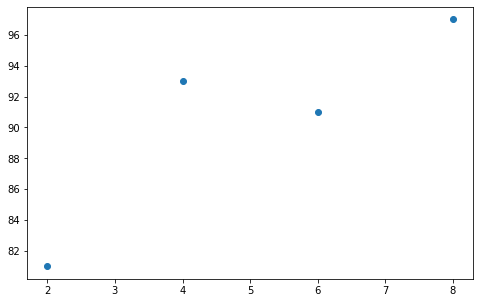

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 Y의 리스트를 만들기
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [12]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
# (인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x_data = np.array(x)    # 공부 시간
y_data = np.array(y)    # 성적(결과값)

# 기울기 a와 절편 b값 초기화
a = 0
b = 0

# 학습률(learning rate) 정하기
lr = 0.03    # 임의로 정함

# 몇 번 반복될지 설정(0부터 세므로 원하는 반복 횟수+1)
epochs = 2001    # 2000번 반복한다. / 너무 많이 반복하면 과대적합 문제 발생

# 경사하강법 시작
for i in range(epochs):    # 에포크 수인 2000번 반복
    y_pred = a * x_data + b    # y를 구하는 식(일차함수 y = ax + b)
    error = y_pred - y_data    # 오차(예측값 - 실제값)
    
    # 오차 함수를 a로 미분한 값
    a_diff = (2/len(x_data))*sum(error*x_data)
    # 오차 함수를 b로 미분한 값
    b_diff = (2/len(x_data))*sum(error)
    
    a = a - lr * a_diff   # 학습률을 곱해 기존의 a값 업데이트
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b값 업데이트
    
    if i% 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값 출력
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


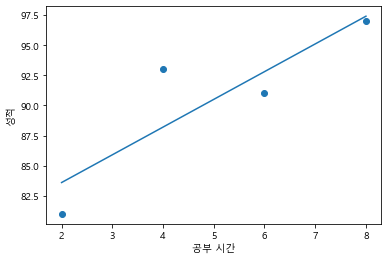

In [13]:
# 앞서 구한 기울기의 절편 이용해 그래프 다시 그리기
y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
# (min(x_data), min(y_pred))좌표와 (max(x_data),max(y_pred))좌표를 기준으로 선 긋기

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.xlabel("공부 시간")
plt.ylabel("성적")
plt.show()

## 코딩으로 확인하는 다중 선형 회귀
변수 개수 늘어났을 때  

$y = a_1x_1 + a_2x_2 + b$  

기울기를 두 개($a_1, a_2$) 구해야 한다.

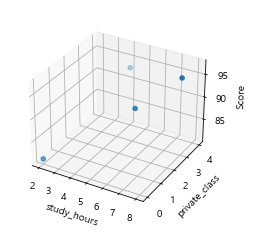

In [8]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]    # 공부시간, 과외수업횟수, 성적
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # 3D 그래프 그리는 라이브러리 가져오기

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist=11
ax.scatter(x1,x2,y)
plt.show()

In [9]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
# (인덱스로 하나씩 불러와 계산할 수 있도록 하기 위함)
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습률
lr = 0.02

# 몇 번 반복할지 설정(0부터 세므로 원하는 반복 횟수에 +1)
epochs = 2001

# 경사하강법 시작
for i in range(epochs):
    y_pred = a1*x1_data + a2*x2_data + b    # y를 구하는 식
    error = y_pred - y_data    # 오차 구하는 식(예측값 - 실제값)
    
    # 오차 함수를 a1로 미분한 값
    a1_diff = (2/len(x1_data))*sum(error*x1_data)
    # 오차 함수를 a2로 미분한 값
    a2_diff = (2/len(x2_data))*sum(error*x2_data)
    # 오차 함수를 b로 미분한 값
    b_diff = (2/len(x1_data))*sum(error)
    
    a1 = a1 - lr * a1_diff    # 학습률을 곱해 기존의 a1값 업데이트
    a2 = a2 - lr * a2_diff    # 학습률을 곱해 기존의 a2값 업데이트
    b = b - lr * b_diff       # 학습률을 곱해 기존의 b값 업데이트
    
    if i%100 == 0:
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.

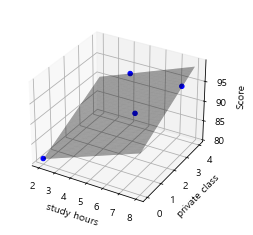

In [10]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

## 로지스틱 회귀
참 거짓 판단 장치

#### 시그모이드 함수
$$y = {1 \over 1+e^{-(ax+b)}}$$  

a는 그래프의 경사도: a값이 작아지면 오차는 무한대로 커짐 / a값이 커져도 오차가 무한대로 커지지 않음  
b는 그래프의 좌우 이동: b값이 너무 크거나 작을 경우 오차 커짐: 이차함수 그래프와 유사한 형태  
        
- 시그모이드 함수 특징: y값이 0 ~ 1 사이  
    
    - 실제 값이 1일 때 예측 값이 0에 가까워지면 오차 커짐
    - 실제 값이 0일 때 예측 값이 1에 가까워지면 오차 커짐  
    
    - 로그함수 이용
    - 실제값이 0일 때: -log(1-h)
    - 실제값이 1일 때: -logh
      
    - 비용함수: -{ y_data * logh + (1 - y_data) * log(1-h) }
      
    - 실제값이 y_data일 때, 1이면 B부분(뒤) 사라짐 / 0이면 A부분(앞) 사라짐
    - 실제값에 따라 적절한 그래프 이용할 수 있게 됨  
    
    - 목적함수: $-\frac{1}{n} \sum{ [y\_data * logh + (1 - y\_data) * log(1-h)] }$
    
Linear Regression에서 했던 것처럼 패널티를 주기 위한 제곱을 하진 않는다.(오차를 더하면 0이 될 가능성)  
log 자체에 패널티와 동일한 무한대로 수렴하는 값이 있어 제곱을 할 필요가 없다.  
    
이때 로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피(Cross Entropy)함수라고 한다.  
즉, 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하며,  
가중치를 찾기 위해서 크로스 엔트로피 함수의 평균을 취한 함수를 사용합니다.  
크로스 엔트로피 함수는 소프트맥스 회귀의 비용 함수이기도 하다.

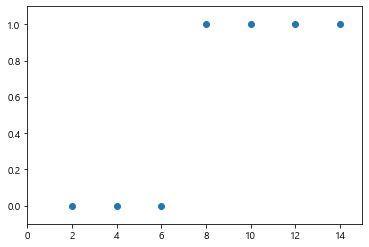

In [14]:
# 로지스틱 회귀를 위해서는 시그모이드 함수를 사용
# 시그모이드 함수는 0부터 1 사이의 값을 가지는 특성 → 로그 함수 함께 써야 함

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [i[0] for i in data]    # 공부한 시간 데이터
y_data = [i[1] for i in data]    # 함격 여부(0: 불합격, 1: 합격)

import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.show()

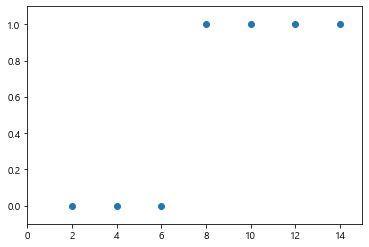

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


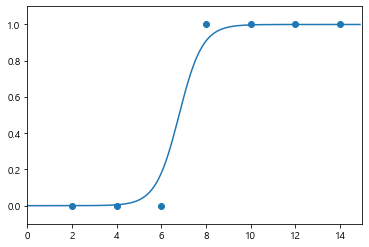

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [i[0] for i in data]    # 공부한 시간 데이터
y_data = [i[1] for i in data]    # 함격 여부(0: 불합격, 1: 합격)

import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.show()

# 기울기 a와 절편 b값 초기화
a = 0
b = 0

lr = 0.05    # 학습률

# 시그모이드 함수 정의
def sigmoid(x):
    return 1/(1 + np.e**(-x))    # 시그모이드 식 그대로 옮김

# 1000번 반복될 때마다 각 x_data 값에 대한 현재의 a값, b값 출력
for i in range(2001):
    for x, y in data:
        # a에 관한 편미분. 앞서 정의한 sigmoid 함수 사용
        a_diff = x * (sigmoid(a * x + b) - y)
        # b에 관한 편미분
        b_diff = (sigmoid(a * x + b) - y)
        a = a - lr * a_diff    # a를 업데이트
        b = b - lr * b_diff    # b를 업데이트
        if i % 1000 == 0:
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

# 앞서 구한 기울기와 절편 이용해 그래프 그리기
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))    # 그래프로 나타낼 x값의 범위 정하기
plt.plot(np.arange(0,15,0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

In [16]:
# 시그모이드 형태의 함수가 잘 만들어졌다.
# 만약 입력값이 추가되어 세 개 이상의 입력값을 다루면 소프트맥스라는 함수를 써야 한다.

## 친밀도 계산 알고리즘

In [17]:
# 친구 리스트에서 자신의 모든 친구를 찾고 친구들의 친밀도를 계산하는 알고리즘
# 입력: 친구 관계 그래프 g, 모든 친구를 찾을 자신 start
# 출력: 모든 친구의 이름과 자신과의 친밀도

def print_all_friends(g, start):
    qu = []          # 기억 장소 1: 앞으로 처리해야 할 (사람 이름, 친밀도) 튜플을 큐에 저장
    done = set()     # 기억 장소 2: 이미 큐에 추가한 사람을 집합에 기록(중복 방지)
    
    qu.append((start,0))    # (사람 이름, 친밀도) 정보를 하나의 튜플로 묶어 처리 / 자기 자신의 친밀도: 0
    # 소괄호가 두 번 사용된 이유는 append() 함수의 인자로 start와 0을 묶어 만든 튜플(start,0)을 전달했기 때문
    done.add(start)         # 집합에도 추가
    
    while qu:                  # 큐에 처리할 사람이 남아 있는 동안
        (p,d) = qu.pop(0)      # 큐에서 (사람 이름, 친밀도) 정보를 p와 d로 각각 꺼냄
        print(p,d)             # 사람 이름과 친밀도를 출력
        for x in g[p]:        # 친구들 중에
            if x not in done:            # 아직 큐에 추가된 적이 없는 사람을
                qu.append((x, d+1))       # 친밀도를 1 증가시켜 큐에 추가하고
                done.add(x)               # 집합에도 추가

fr_info = {
    'Summer':['John','Justin','Mike'],
    'John':['Summer','Justin'],
    'Justin':['John','Summer','Mike','May'],
    'Mike':['Summer','Justin'],
    'May':['Justin','Kim'],
    'Kim':['May'],
    'Tom':['Jerry'],
    'Jerry':['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer 0
John 1
Justin 1
Mike 1
May 2
Kim 3

Jerry 0
Tom 1


### 파이썬의 튜플
- 여러 개의 정보를 묶어서 하나의 ㅈ어보처럼 사용하기 위한 기능
- 수학에서 x좌표와 y좌푤르 묶어서 순서쌍(x,y)으로 표현하는 것과 비슷한 개념
- 튜플로 묶어서 보관하고자 하는 정보가 있다면 소괄호 안에 쉼표(,)를 찍어 나열하면 됨

In [18]:
t = (3,7)
t

(3, 7)

In [19]:
t[0]    # 튜플 t의 첫 번째 정보 값

3

In [20]:
t[1]    # 튜플 t의 두 번째 정보 값

7

In [21]:
(x,y) = t    # 튜플 t 안의 값들을 변수 x와 y에 각각 저장합니다.
print(x)
print(y)

3
7


#### 연습 문제
15-1. 다음 그래프를 탐색하는 프로그램을 만들어 보세요(시작 꼭짓점: 1)  
1 - 3,2  
2 - 4,5
  
15-2. 위에서 만든 프로그램이 그래프를 탐색해 가는 과정을 단계별로 적어보세요

In [22]:
# 그래프 탐색: 너비 우선 탐색
# 입력: 그래프 g, 탐색 시작점 start
# 출력: start에서 출발해 연결된 꼭짓점들을 출력

def bfs(g, start):
    qu = []           # 기억 장소 1: 앞으로 처리해야 할 꼭짓점을 큐에 저장
    done = set()      # 기억 장소 2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복 방지)
    
    qu.append(start)  # 시작점을 큐에 넣고 시작
    done.add(start)   # 집합에도 추가
    
    while qu:                     # 큐에 처리할 꼭짓점이 남아 있으면
        p = qu.pop(0)             # 큐에서 처리 대상을 꺼내어
        print(p)                  # 꼭짓점 이름을 출력하고
        for x in g[p]:           # 대상 꼭짓점에 연결된 꼭짓점들 중에
            if x not in done:   # 아직 큐에 추가된 적이 없는 꼭짓점들을
                qu.append(x)     # 큐에 추가하고
                done.add(x)      # 집합에도 추가
                
# 그래프 정보
g = {
    1:[2,3],
    2:[1,4,5],
    3:[1],
    4:[2],
    5:[2]
}

bfs(g,1)

1
2
3
4
5


- 시작 꼭짓점을 qu와 done에 각각 추가하고 시작
    - qu = [1], done = {1}
- qu에서 1 꺼내 출력*
    - qu = [], done = {1}
- 1에서 연결된 2,3을 qu와 done에 추가
    - qu = [2,3], done = {1,2,3}
- qu에서 2 꺼내 출력*
    - qu = [3], done = {1,2,3}
- 2에서 연결된 1,4,5 중 추가된 적 없는 4,5를 qu와 done에 추가
    - qu = [3,4,5], done = {1,2,3,4,5}
- qu에서 3 꺼내 출력*
    - qu = [4,5], done = {1,2,3,4,5}
- 3에서 연결된 1은 추가되었으므로 패스
- qu에서 4 꺼내 출력*
    - qu = [5], done = {1,2,3,4,5}
- 4에서 연결된 2는 추가되었으므로 패스
- qu에서 5 꺼내 출력*
    - qu = [], done = {1,2,3,4,5}
- 5에서 연결된 2는 추가되었으므로 패스
- qu가 비었으므로 종료
- 출력된 결과는 1 - 2 - 3 - 4 - 5

## 탐욕 알고리즘(Greedy Algorithm)
### 1. 수업 시간표 짜기 문제
- 각 단계에서 최적의 수를 찾아 전역 최적해 구하기
- 예) 시간이 일부 겹치는 과목들 중 되도록 많은 수업을 들으려는 경우
    - 가장 빨리 끝나는 과목을 골라 먼저 신청
    - 첫 번째 과목이 끝난 후 시작하여 가장 빨리 끝나는 과목 신청
    - 위와 같이 반복  
  

### 2. 배낭 채우기 문제
- 예) 일정 무게만 담을 수 있는 배낭에 최대 가격의 물건들 넣기
    - 가방에 들어갈 수 있는 것 중 가장 비싼 물건을 고름
    - 그 다음으로 들어갈 수 있는 것 중 가장 비싼 것을 고름
    - 위와 같이 반복
    
  
### 3. 집합 커버링 문제
- 예) 라디오 쇼를 최대한 적은 수의 방송국을 방문하면서 미국 50개 주 모두에 송출하려면?
- 첫 번째 방법
    - 가능한 모든 방송국의 부분 집합을 나열 : $2^n개$
    - 그 중 50개 주 전체를 커버하면서 가장 원소 수가 작은 집합 선택
    - $O(2^n)$시간 소요
        - 항목 수가 증가한다면 매우 비효율적
- 근사 알고리즘(Approximation Algorithm) 사용
    - 정답과 거의 비슷한 답 유추
    - 얼마나 빠른가 & 최적해에 얼마나 가까운가
    - 아직 방송하지 않은 지역 중 가장 많은 지역에 방송 가능한 방송국 선택
    - 모든 주에 방송이 될 때까지 선택 반복

## 16 응용_미로 찾기 알고리즘

In [35]:
# 미로 찾기 프로그램(그래프 탐색)
# 입력: 미로 정보 g, 출발점 start, 도착점 end
# 출력: 미로를 나가기 위한 이동 경로는 문자열, 나갈 수 없는 미로면 물음표("?")

def solve_maze(g, start, end):
    qu = []                       # 기억 장소 1: 앞으로 처리해야 할 이동 경로를 큐에 저장
    done = set()                  # 기억 장소 2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복 방지)
    
    qu.append(start)              # 출발점을 큐에 넣고 시작
    done.add(start)               # 집합에도 추가
    
    while qu:                     # 큐에 처리할 경로가 남아 있으면 
        p = qu.pop(0)             # 큐에서 처리 대상을 꺼냄
        #print("p =",p)
        v = p[-1]                 # 큐에 저장된 이동 경로의 마지막 문자가 현재 처리해야 할 꼭짓점
        #print("v =",v)
        #print("g(v) =",g[v])
        if v == end:              # 처리해야 할 꼭짓점이 도착점이면(목적지 도착!)
            return p              # 지금까지의 전체 이동 경로를 돌려주고 종료
        for x in g[v]:            # 대상 꼭짓점에 연결된 꼭짓점들 중에
            if x not in done:     # 아직 큐에 추가된 적이 없는 꼭짓점을
                qu.append(p+x)     # 이동 경로에 새 꼭짓점으로 추가하여 큐에 저장하고
                #print("qu =",qu)
                done.add(x)        # 집합에도 추가
                #print("done =",done)
        #print()
    
    # 탐색을 마칠 때까지 도착점이 나오지 않으면 나갈 수 없는 미로임
    return "?"

# 미로 정보
# 미로의 각 위치에 알파벳으로 이름을 지정
# 각 위치에서 한 번에 이동할 수 있는 모든 위치를 선으로 연결하여 그래프로 표현
maze = {
    'a':['e'],
    'b':['c','f'],
    'c':['b','d'],
    'd':['c'],
    'e':['a','i'],
    'f':['b','g','j'],
    'g':['f','h'],
    'h':['g','l'],
    'i':['e','m'],
    'j':['f','k','n'],
    'k':['j','o'],
    'l':['h','p'],
    'm':['i','n'],
    'n':['j','m'],
    'o':['k'],
    'p':['l']
}

print(solve_maze(maze, 'a', 'p'))

aeimnjfghlp


## 17 가짜 동전 찾기 알고리즘

#### 1) 하나씩 비교하기

In [36]:
# 주어진 동전 n개 중에 가짜 동전(fake)을 찾아내는 알고리즘
# 입력: 전체 동전 위치의 시작과 끝(0, n-1)
# 출력: 가짜 동전의 위치 번호

# 무게 재기 함수
# a에서 b까지에 놓인 동전과
# c에서 d까지에 놓인 동전의 무게를 비교
# a에서 b까지에 가짜 동전이 있으면(가벼우면): -1
# c에서 d까지에 가짜 동전이 있으면(가벼우면): 1
# 가짜 동전이 없으면(양쪽 무게가 같으면): 0

def weigh(a, b, c, d):
    fake = 29    # 가짜 동전의 위치(알고리즘은 weigh() 함수를 이용하여 이 값을 맞혀야 함)
    if a <= fake and fake <= b:
        return -1
    if c <= fake and fake <= d:
        return 1
    return 0

# weigh() 함수(저울질)를 이용하여
# left에서 right까지에 놓인 가짜 동전의 위치를 찾아냄
def find_fakecoin(left, right):
    for i in range(left + 1, right + 1):    # left+1부터 right까지 반복
        # 가장 왼쪽 동전과 나머지 동전을 차례로 비교
        result = weigh(left, left, i, i)
        if result == -1:    # left 동전이 가벼움(left 동전이 가짜)
            return left
        elif result == 1:   # i 동전이 가벼움(i 동전이 가짜)
            return i
        # 두 동전의 무게가 같으면 다음 동작으로
    # 모든 동전의 무게가 같으면 가짜 동전이 없는 예외 경우
    return -1

n = 100    # 전체 동전 개수
print(find_fakecoin(0, n-1))

29


#### 로지스틱 회귀 → 퍼셉트론
$y = a_1x_1 + a_2x_2 + b$  
$x_1$과 $x_2$가 입력되고, 각각 가중치 $a_1, a_2$를 만납니다.  
여기에 $b$값을 더한 후 시그모이드 함수를 거쳐 $1$ 또는 $0$의 출력값 $y$를 출력합니다.  
  
퍼셉트론: 신경망을 이루는 가장 작은 신경망 단위  
$y = wx + b$
  
퍼셉트론의 한계 XOR을 다층 퍼셉트론으로 해결  
좌표 평면 자체에 변화를 주어야 함 → 두 개의 퍼셉트론 한 번에 계산(은닉층을 만든다)  
은닉층 - 좌표 평면을 왜곡시킨다.

## 코딩으로 XOR 문제 해결하기

In [8]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w*x) + b    # 입력값에 가중치를 곱한 것을 모두 더한 다음, 바이어스를 더한다.
    if y <= 0:    # 그 값이 0 또는 음수일 때 
        return 0  # 0을 리턴
    else:         # 그 값이 양수일 때
        return 1  # 1을 리턴
    
# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)    # 과정(1) n1: NAND 게이트를 통과한다.

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)    # 과정(1) n2: OR 게이트를 통과한다.

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)     # 과정(2) y(out): AND 게이트를 통과한다.

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))
    # NAND게이트를 통과한 n1과 OR게이트를 통과한 n2를 
    # AND게이트를 통과하게 한다.
    # → XOR게이트
    
# x1, x2값을 번갈아 대입하며 최종값 출력
if __name__ == '__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:    # 입력값
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


## 17 가짜 동전 찾기 알고리즘

#### 2) 반씩 그룹으로 나누어 비교하기

In [1]:
# 주어진 동전 n개 중에 가짜 동전(fake)을 찾아내는 알고리즘
# 입력: 전체 동전 위치의 시작과 끝(0, n-1)
# 출력: 가짜 동전의 위치 번호

# 무게 재기 함수
# a에서 b까지에 놓인 동전과
# c에서 d까지에 놓인 동전의 무게를 비교
# a에서 b까지에 가짜 동전이 있으면(가벼우먼): -1
# c에서 d까지에 가짜 동전이 있으면(가벼우먼): 1
# 가짜 동전이 없으면(양쪽 무게가 같으면): 0

def weigh(a,b,c,d):
    fake = 29    # 가짜 동전의 위치(알고리즘은 weigh() 함수를 이용하여 이 값을 맞혀야 함)
    if a <= fake and fake <= b:    # a <= fake <= b
        return -1
    if c <= fake and fake <= d:    # c <= fake <= d
        return 1
    return 0

# weigh() 함수(저울질)을 이용하여
# left에서 right까지에 놓인 가짜 동전의 위치를 찾아냄
def find_fakecoin(left, right):
    # 종료 조건: 가짜 동전이 있을 범위 안에 동전이 한 개뿐이면 그 동전이 가짜 동전
    if left == right:
        return left
    # left에서 right까지에 놓인 동전을 두 그룹(g1_left~g1_right, g2_left~g2_right)으로 나눔
    # 동전 수가 홀수면 두 그룹으로 나누고 한 개가 남음
    half = (right - left + 1) // 2
    g1_left = left
    g1_right = left + half - 1
    g2_left = left + half
    g2_right = g2_left + half - 1
    # 나눠진 두 그룹을 weigh() 함수를 이용하여 저울질함
    result = weigh(g1_left, g1_right, g2_left, g2_right)    # a, b, c, d
    if result == -1:    # 그룹 1이 가벼움(가짜 동전이 이 그룹에 있음)
        # 그룹 1 범위를 재귀 호출로 다시 조사
        return find_fakecoin(g1_left, g1_right)    # 또 범위를 나누어서 저울에 달아봄
    elif result == 1:    # 그룹 2가 가벼움(가짜 동전이 이 그룹에 있음)
        # 그룹 2 범위를 재귀 호출로 다시조사
        return find_fakecoin(g2_left, g2_right)
    else:    # 두 그룹의 무게가 같으면(나뉜 두 그룹 안에 가짜 동전이 없다면)
        return right    # 두 그룹으로 나뉘지 않고 남은 나머지 한 개의 동전이 가짜 동전임
    
n = 100    # 전체 동전 개수
print(find_fakecoin(0, n-1))

29


## 18 최대 수익 알고리즘

#### 1) 가능한 모든 경우를 비교하기

In [4]:
# 주어진 주식 가격을 보고 얻을 수 있는 최대 수익을 구하는 알고리즘
# 입력: 주식 가격의 변화 값(리스트: prices)
# 출력: 한 주를 한 번 사고 팔아 얻을 수 있는 최대 수익 값
def max_profit(prices):
    n = len(prices)
    max_profit = 0    # 최대 수익은 항상 0 이상의 값
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            # i날에 사서 j날에 팔았을 때 얻을 수 있는 수익
            profit = prices[j] - prices[i]
            # 이 수익이 지금까지 최대 수익보다 크면 값을 고침
            if profit > max_profit:
                max_profit = profit
    
    return max_profit

stock = [10300,9600,9800,8200,7800,8300,9500,9800,10200,9500]
print(max_profit(stock))

2400


#### 2) 한 번 반복으로 최대 수익 찾기

In [5]:
# 주어진 주식 가격을 보고 얻을 수 있는 최대 수익을 구하는 알고리즘
# 입력: 주식 가격의 변화 값(리스트: prices)
# 출력: 한 주를 한 번 사고 팔아 얻을 수 있는 최대 수익 값

def max_profit(prices):
    n = len(prices)
    max_profit = 0        # 최대 수익은 항상 0 이상의 값
    min_price = prices[0] # 첫째 날의 주가를 주가의 최솟값으로 기억
    for i in range(1, n):    # 1부터 n-1까지 반복
        # 지금까지의 최솟값에 주식을 사서 i날에 팔 때의 수익
        profit = prices[i] - min_price
        
        # 이 수익이 지금까지 최대 수익보다 크면 값을 고침
        if profit > max_profit:
            max_profit = profit
        
        # i날의 주가가 최솟값보다 작으면 값을 고침
        if prices[i] < min_price:
            min_price = prices[i]
            
    return max_profit

stock = [10300,9600,9800,8200,7800,8300,9500,9800,10200,9500]
print(max_profit(stock))

2400


#### 최대 수익을 구하는 두 알고리즘의 계산 속도를 비교하기

In [12]:
# 최대 수익 문제를 푸는 두 알고리즘의 계산 속도 비교하기
# 최대 수익 문제를 O(n*n)과 O(n)으로 푸는 알고리즘을 각각 수행하여
# 걸린 시간을 출력/비교함

import time    # 시간 측정을 위한 time 모듈
import random  # 테스트 주가 생성을 위한 random 모듈

# 최대 수익: 느린 O(n*n) 알고리즘
def max_profit_slow(prices):
    n = len(prices)
    max_profit = 0
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            # i날에 사서 j날에 팔았을 때 얻을 수 있는 수익
            profit = prices[j] - prices[i]
            # 이 수익이 지금까지 최대 수익보다 크면 값을 고침
            if profit > max_profit:
                max_profit = profit
                
    return max_profit

# 최대 수익: 빠른 O(n) 알고리즘
def max_profit_fast(prices):
    n = len(prices)
    max_profit = 0        # 최대 수익은 항상 0 이상의 값
    min_price = prices[0] # 첫째 날의 주가를 주가의 최솟값으로 기억
    
    for i in range(1, n):    # 1부터 n-1까지 반복
        # 지금까지의 최솟값에 주식을 사서 i날에 팔 때의 수익
        profit = prices[i] - min_price
        # 이 수익이 지금까지 최대 수익보다 크면 값을 고침
        if profit > max_profit:
            max_profit = profit
        # i날의 주가가 최솟값보다 작으면 값을 고침
        if prices[i] < min_price:
            min_price = prices[i]
            
    return max_profit

def test(n):
    # 테스트 자료 만들기(5000부터 20000까지의 난수를 주가로 사용)
    a = []
    for i in range(0, n):
        a.append(random.randint(5000, 20000))
    
    # 느린 O(n*n) 알고리즘 테스트
    start = time.time()        # 계산 시작 직전 시각을 기억
    mps = max_profit_slow(a)   # 계산 수행
    end = time.time()          # 계산 시작 직후 시각을 기억
    time_slow = end - start    # 직후 시각에서 직전 시각을 빼면 계산에 걸린 시간
    
    # 빠른 O(n) 알고리즘 테스트
    start = time.time()
    mpf = max_profit_fast(a)
    end = time.time()
    time_fast = end - start
    
    # 결과 출력: 계산 결과
    print(n, mps, mpf)    # 입력 크기, 각각 알고리즘이 계산한 최대 수익 값(같아야 함)
    
    # 결과 출력: 계산 시간 비교
    m = 0    # 느린 알고리즘과 빠른 알고리즘의 수행 시간 비율을 저장할 변수
    if time_fast > 0:    # 컴퓨터 환경에 따라 빠른 알고리즘 시간이 0으로 측정될 수 있음 / 이럴 때는 0을 출력
        m = time_slow / time_fast    # 느린 알고리즘 시간 / 빠른 알고리즘 시간
    # 입력 크기, 느린 알고리즘 수행 시간, 빠른 알고리즘 수행 시간, 계산 시간 차이
    # %d는 정수 출력, %.5f는 소수점 다섯 자리까지 출력을 의미
    print("%d %.5f %.5f %.2f" % (n, time_slow, time_fast, m))
    
test(100)
test(10000)
#test(100000)

100 14924 14924
100 0.00100 0.00000 0.00
10000 14997 14997
10000 10.85311 0.00200 5436.02


# 다익스트라 알고리즘

## 1 최단 경로 문제
그래프 내의 한 정점에서 다른 정점으로 이동할 때 가중치 합이 최소값이 되도록 만드는 경로를 찾는 알고리즘  
- 가중 간선(Edge Weight)
    - 간선들이 할당된 값을 가짐
- 가중 경로(Path Weight)
    - 경로에 속하는 모든 간선의 값을 더한 값  
  
  
가중 간선이 아닌 경우는 간선의 수를 가지고 최단 경로를 구하기도 함  
- 모든 간선 가중치가 음이 아닌 일반적인 경우
    - 다익스트라 알고리즘  
  
  
- 음의 가중치가 존재하는 경우
    - 벨만-포드 알고리즘
    - 음의 가중치는 허용하지만 가중치 합이 음인 사이클은 절대 허용하지 않음
    - 음의 사이클이 존재하면 해당 사이클을 계속 반복한다면 가중치 합이 무한히 작아질 수 있으므로 최단 경로 문제 자체가 성립하지 않음  
  
  
#### 다익스트라 알고리즘
- 어떠한 간선도 음수값을 갖지 않는 방향 그래프에서 주어진 출발점과 도착점 사이의 최단 경로를 찾아주는 알고리즘
- 방향그래프, 무방향 그래프 모두 가능
- 프림 알고리즘이 단순히 간선의 길이를 이용해 어떤 간선을 먼저 연결할지를 결정하는데 반해 다익스트라 알고리즘은 <span style="color:red">경로의 길이</span>를 감안해서 간선을 연결함
- 하나의 출발점에서 다른 모든 정점까지의 최단 경로를 구하는 방법
- 모든 노드를 순회해야 하므로 시간복잡도에 결정적인 영향 미침. 제대로 구현된 우선순위 큐를 활용하면 비용을 줄일 수 있다.
- 처음 고안한 알고리즘은 $O(V^2)$의 시간복잡도 → 우선순위 큐 등을 이용한 개선된 알고리즘을 통해 $O(E logV)$의 시간복잡도
- 다익스트라 알고리즘은 벨만-포드 알고리즘과 동일한 작업 수행. 실행 속도 더 빠름
- 가중치가 음수인 경우에는 처리할 수 없으므로 벨만-포드 알고리즘 사용
- 가능한 적은 비용으로 가장 빠르게 해답에 도달하는 경로를 찾아내는 대부분의 문제에 응용됨
- 내비게이션에서 각 도시들을 정점. 도로를 간선으로 갖는 그래프로 간주할 때 두 도시를 잇는 가장 빠른 길을 찾는 문제
- 미로 탐색 알고리즘으로 사용할 수 있다.
- 라우팅에서도 IP 라우팅 프로토콜의 한 종류인 OSPF 방식의 프로토콜에서 사용
  
1. 각 정점 위에 시작점으로부터 자신에게 이르는 경로의 길이를 저장할 곳을 준비하고 모든 정점 위에 있는 경로의 길이를 무한대로 초기화
2. 시작 정점의 경로 길이를 0으로 초기화하고(시작 정점에서 시작 정점까지의 거리는 0) 최단 경로에 추가
3. 최단 경로에 새로 추가된 정점의 인접 정점들에 대해 경로 길이를 갱신하고 이들을 최단 경로에 추가. 만약 추가하려는 인접 정점이 이미 최단 경로 안에 존재한다면 갱신되기 이전의 경로 길이가 새로운 경로의 길이보다 더 큰 경우에 한해 다른 선행 정점을 지나던 기존의 경로를 현재 정점을 경유하도록 수정
4. 그래프 내의 모든 정점이 최단 경로에 소속될 때까지 이전 과정 반복